# Load Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Atomcamp/ML/abalone.csv")
df.head()

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# Set global defaults
mpl.rcParams['image.cmap'] = 'viridis'
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=plt.cm.viridis(np.linspace(0, 1, 10)))

# Exploratory Data Analysis

In [ ]:
df.shape

(4177, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           4177 non-null   object 
 1   LongestShell   4177 non-null   float64
 2   Diameter       4177 non-null   float64
 3   Height         4177 non-null   float64
 4   WholeWeight    4177 non-null   float64
 5   ShuckedWeight  4177 non-null   float64
 6   VisceraWeight  4177 non-null   float64
 7   ShellWeight    4177 non-null   float64
 8   Rings          4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
df.describe()

,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
df.columns

Index(['Type', 'LongestShell', 'Diameter', 'Height', 'WholeWeight',
       'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings'],
      dtype='object')

In [ ]:
df.nunique()

,0
Type,3
LongestShell,134
Diameter,111
Height,51
WholeWeight,2429
ShuckedWeight,1515
VisceraWeight,880
ShellWeight,926
Rings,28


In [ ]:
df.isnull().count()

,0
Type,4177
LongestShell,4177
Diameter,4177
Height,4177
WholeWeight,4177
ShuckedWeight,4177
VisceraWeight,4177
ShellWeight,4177
Rings,4177


<Axes: >

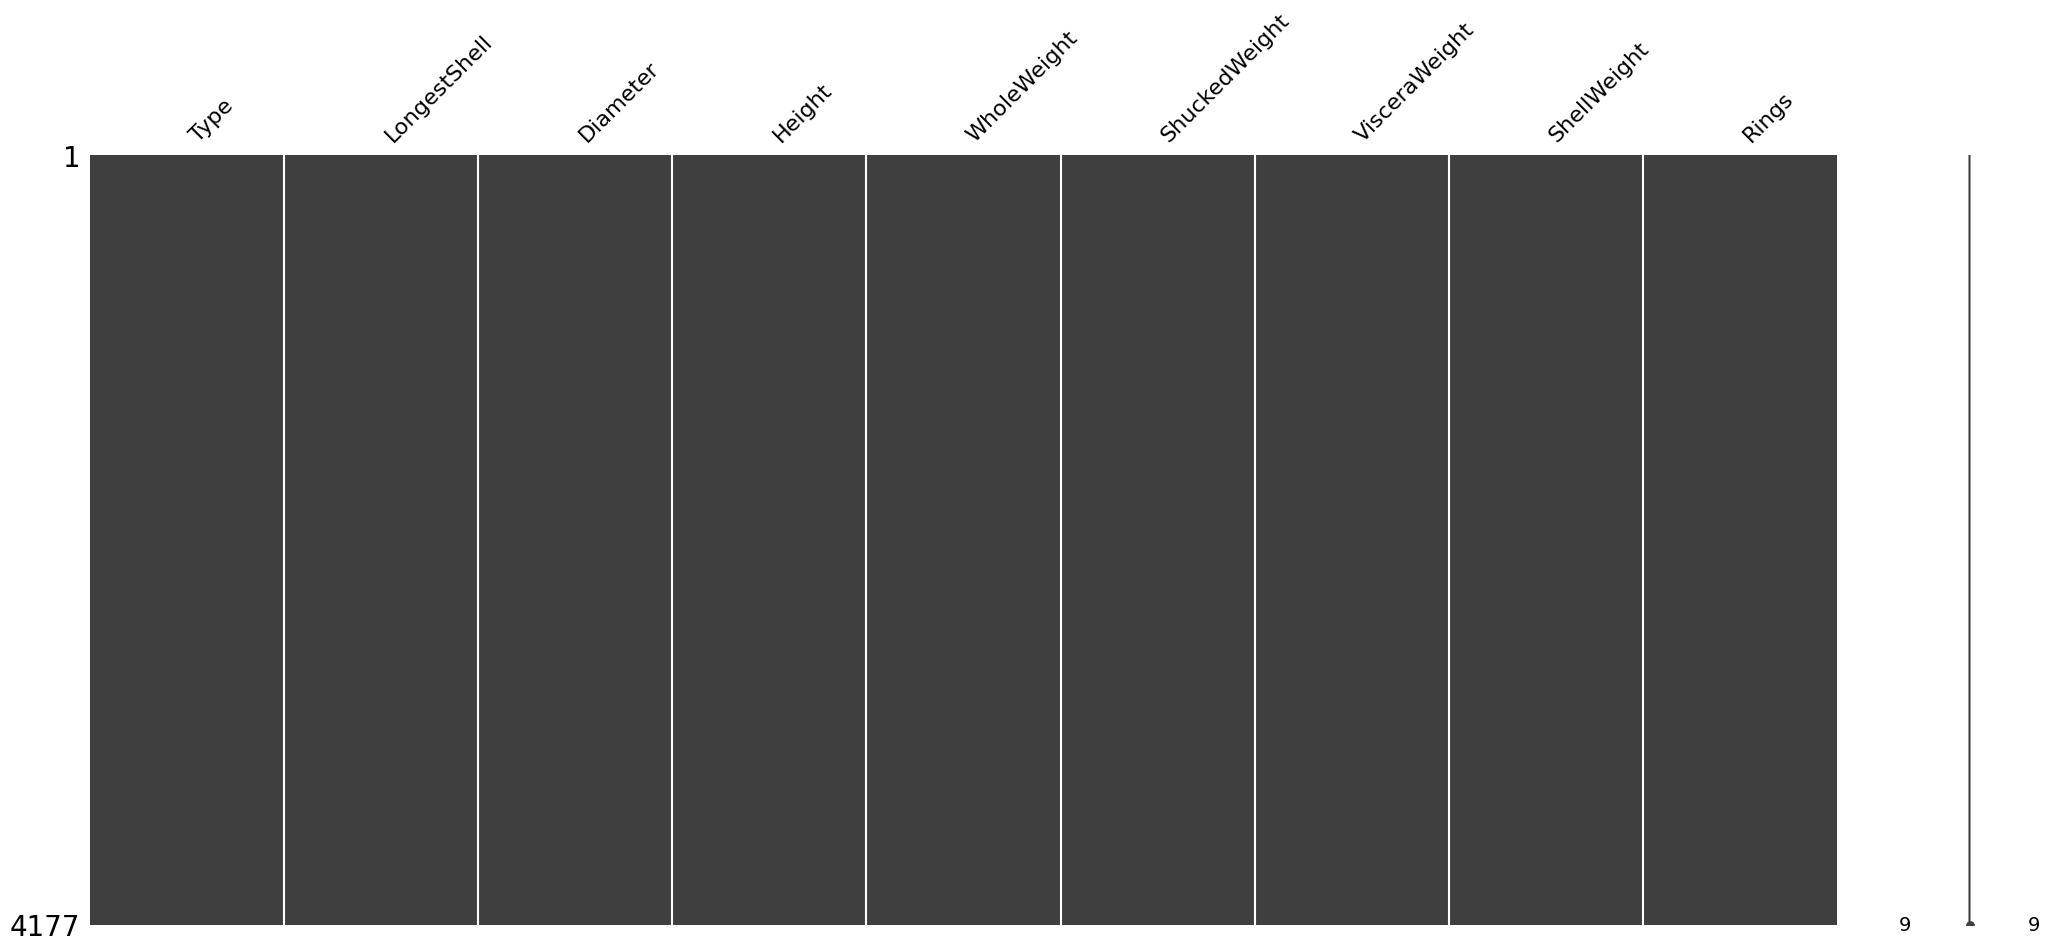

In [ ]:
import missingno as msno

msno.matrix(df)

In [ ]:
# Count missing values per column
print(df.isnull().sum())

# Percentage of missing values
print(df.isnull().mean() * 100)

Type             0
LongestShell     0
Diameter         0
Height           0
WholeWeight      0
ShuckedWeight    0
VisceraWeight    0
ShellWeight      0
Rings            0
dtype: int64
Type             0.0
LongestShell     0.0
Diameter         0.0
Height           0.0
WholeWeight      0.0
ShuckedWeight    0.0
VisceraWeight    0.0
ShellWeight      0.0
Rings            0.0
dtype: float64


In [ ]:
# Identify categorical columns
categorical_cols = [col for col in df.columns if not pd.api.types.is_numeric_dtype(df[col])]

print("Categorical columns dropped:", categorical_cols)

# Drop them directly from df
df.drop(columns=categorical_cols, inplace=True)

print("Remaining columns in df:", df.columns.tolist())

Categorical columns dropped: ['Type']
Remaining columns in df: ['LongestShell', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings']


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [ ]:
X_scaled_df = pd.DataFrame(X_scaled, columns=df.columns)
X_scaled_df.head()

,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013


# K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans

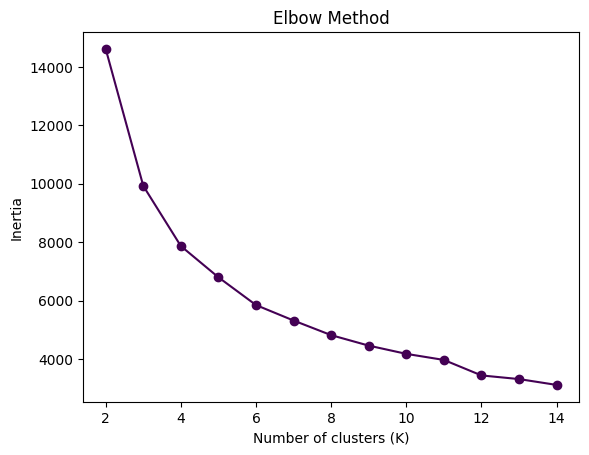

In [ ]:
inertia = []
K_range = range(2, 15)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Fit final KMeans model
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled_df)

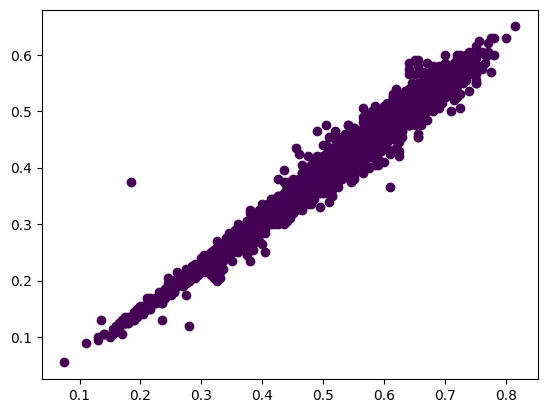

In [ ]:
plt.scatter(df['LongestShell'], df['Diameter'])

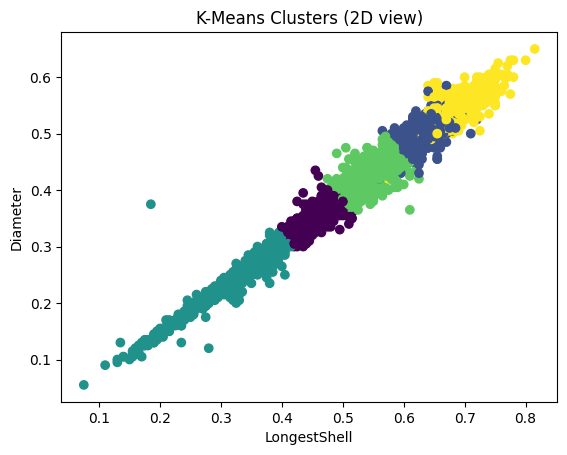

In [ ]:
X_scaled_all = StandardScaler().fit_transform(df.drop(columns=['KMeans_Cluster']))
kmeans = KMeans(n_clusters=5, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled_all)

# Scatter plot using 2 features only
plt.scatter(df['LongestShell'], df['Diameter'], c=df['KMeans_Cluster'])
plt.xlabel('LongestShell')
plt.ylabel('Diameter')
plt.title('K-Means Clusters (2D view)')
plt.show()

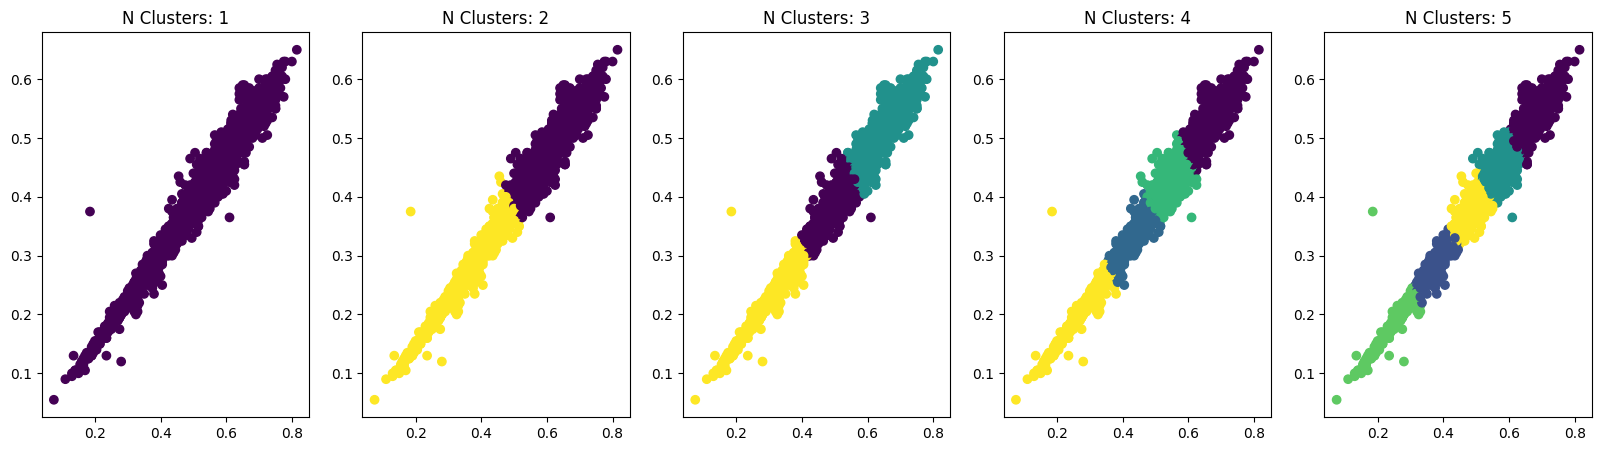

In [ ]:
for k in range(1, 6):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(df[['LongestShell', 'Diameter']])
    df [f'KMeans_{k}'] = kmeans. labels_
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20,5))

for i, ax in enumerate(fig.axes, start=1):
    ax. scatter(x=df ['LongestShell' ], y=df ['Diameter'], c=df[f'KMeans_{i}'])
    ax.set_title(f'N Clusters: {i}')

# Hierarchical Agglomerative Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
# Transpose so that each row is a feature
df_transposed = X_scaled_df.transpose()

np.shape(df_transposed)

(8, 4177)

In [ ]:
linked = linkage(df_transposed , method='ward', metric='euclidean')

np.shape(linked)

(7, 4)

In [ ]:
df_linked = pd.DataFrame(linked, columns=['c1','c2','distance','size'])
df_linked[['c1','c2','size']] = df_linked[['c1','c2','size']].astype('int')

df_linked.head(10)

,c1,c2,distance,size
0,0,1,10.496477,2
1,3,4,15.987083,2
2,5,9,21.931778,3
3,6,10,29.637155,4
4,8,11,38.516332,6
5,2,12,47.288224,7
6,7,13,77.725208,8


/tmp/ipython-input-3347649498.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("viridis")   # you can try 'plasma', 'cividis', 'coolwarm'


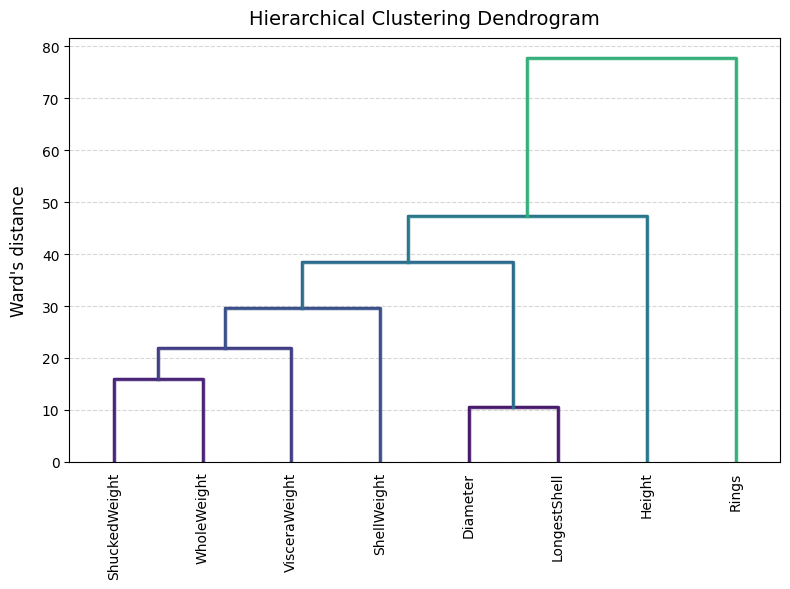

In [ ]:
import matplotlib.cm as cm
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
import numpy as np

# Normalize linkage heights for colormap
norm = plt.Normalize(vmin=0, vmax=linked[:, 2].max())
cmap = cm.get_cmap("viridis")   # you can try 'plasma', 'cividis', 'coolwarm'

plt.figure(figsize=(8, 6))

dendro = dendrogram(
    linked,
    orientation='top',
    labels=df_transposed.index,
    distance_sort='descending',
    show_leaf_counts=True,
    leaf_rotation=90,
    leaf_font_size=10,
    color_threshold=0.7 * max(linked[:, 2]),  # cluster threshold
    above_threshold_color="grey",  # base color for high branches
)

# Recolor the branches with a gradient based on their height
icoord = np.array(dendro['icoord'])
dcoord = np.array(dendro['dcoord'])
for xs, ys, color in zip(icoord, dcoord, dendro['color_list']):
    # Get average height of this segment
    h = np.mean(ys)
    plt.plot(xs, ys,
             color=cmap(norm(h)),
             linewidth=2.5, alpha=0.9)

plt.ylabel("Ward's distance", fontsize=12, labelpad=10)
plt.title('Hierarchical Clustering Dendrogram', fontsize=14, pad=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA, KernelPCA, NMF
from sklearn.manifold import MDS

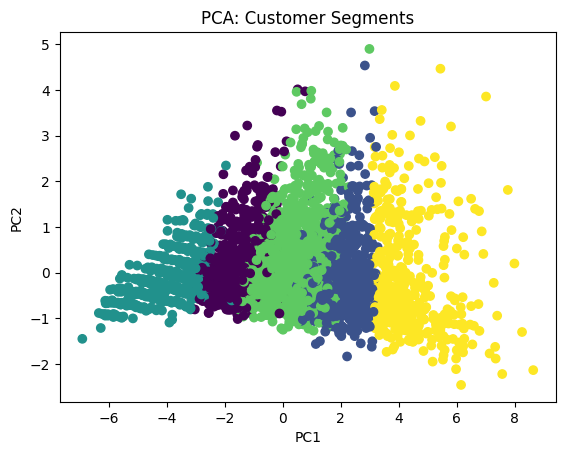

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=df['KMeans_Cluster'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: Customer Segments')
plt.show()

# Kernel PCA

In [ ]:
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=10)
X_kpca = kpca.fit_transform(X_scaled)

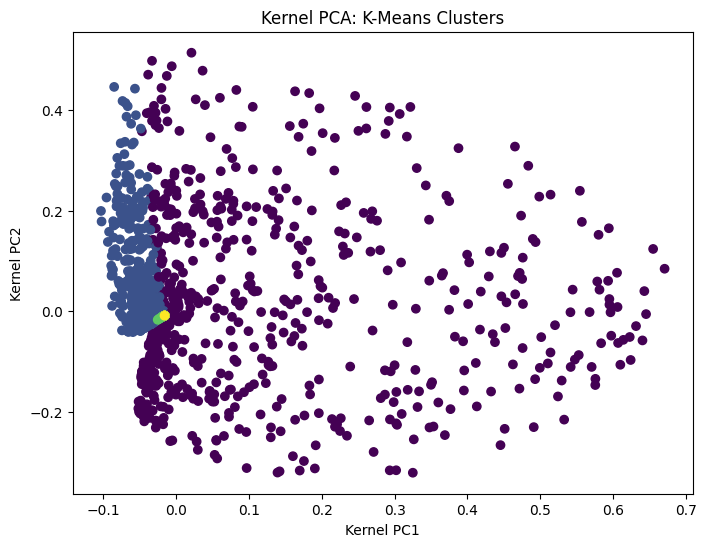

In [ ]:
# 5. Apply K-Means on original scaled data
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 6. Plot Kernel PCA results with K-Means clusters
plt.figure(figsize=(8,6))
plt.scatter(X_kpca[:,0], X_kpca[:,1], c=clusters)
plt.xlabel('Kernel PC1')
plt.ylabel('Kernel PC2')
plt.title('Kernel PCA: K-Means Clusters')
plt.show()


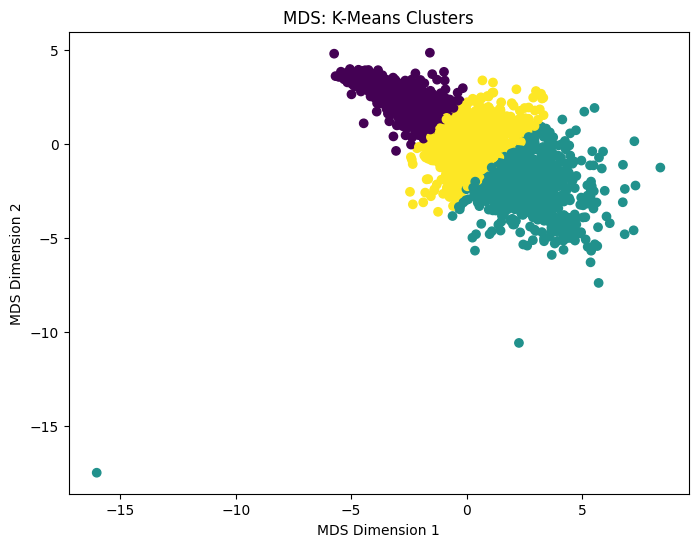

In [ ]:
from scipy.spatial.distance import pdist, squareform

# 3. Compute Euclidean distance matrix
dist_euclidean = squareform(pdist(X_scaled, metric='euclidean'))

# -------------------------
# 4. Apply MDS
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
X_mds = mds.fit_transform(dist_euclidean)

# -------------------------
# 5. Apply K-Means on original scaled data
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# -------------------------
# 6. Plot MDS results with K-Means clusters
plt.figure(figsize=(8,6))
plt.scatter(X_mds[:,0], X_mds[:,1], c=clusters)
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title('MDS: K-Means Clusters')
plt.show()


# DBSCAN

Cluster counts:
 DBSCAN_Cluster
 0    4161
-1      16
Name: count, dtype: int64


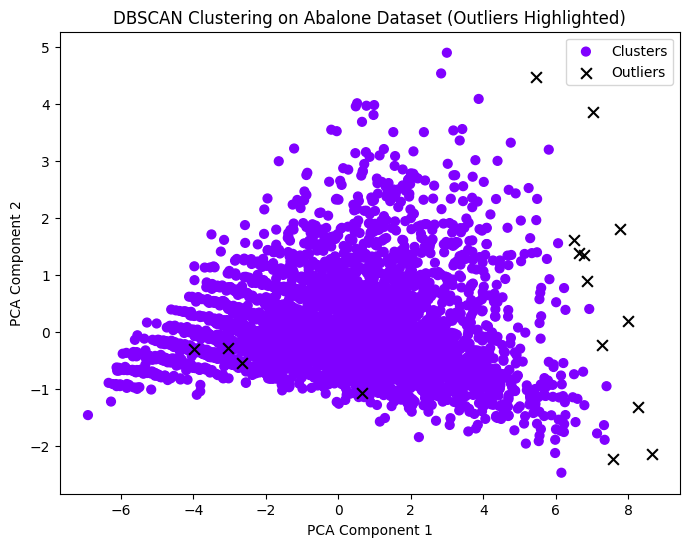

Number of unusual abalones (outliers): 16


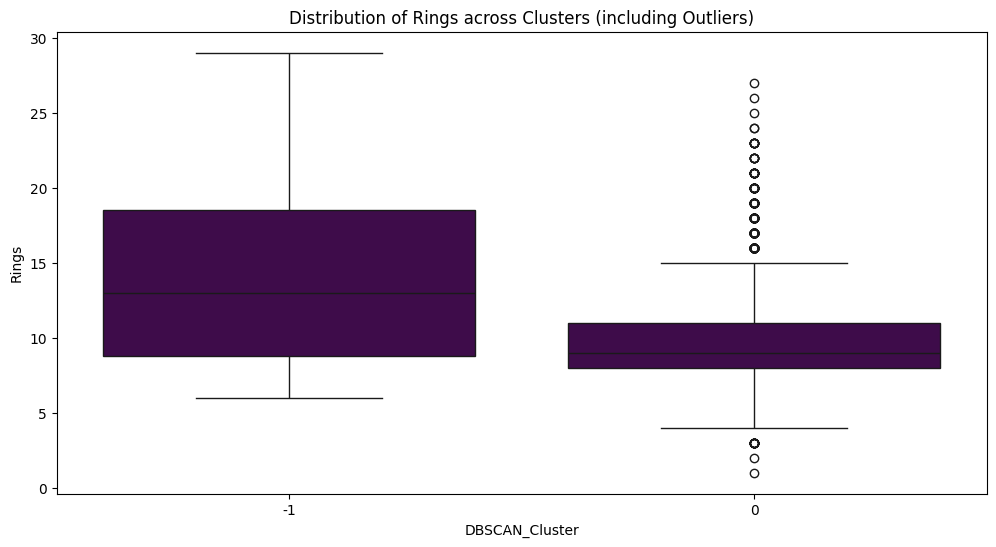

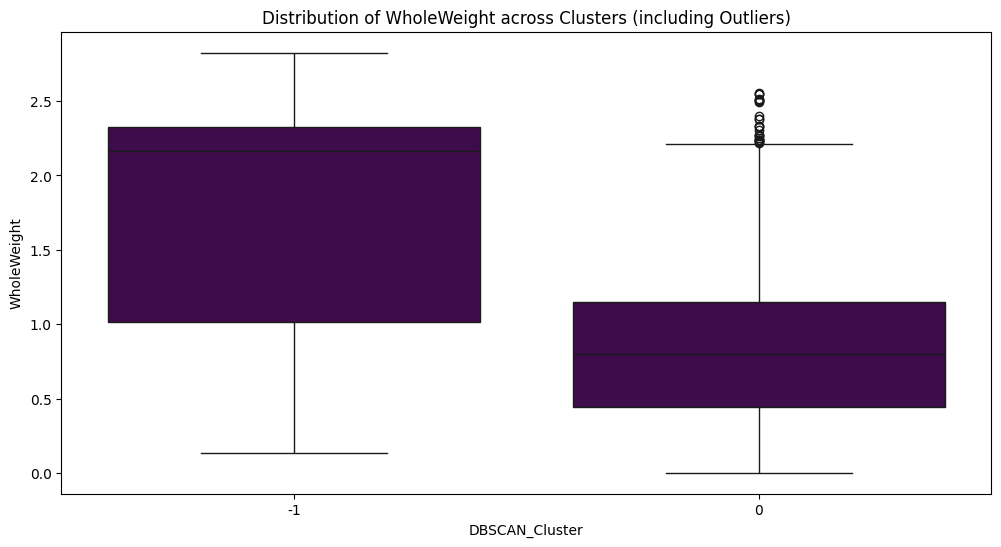

Summary statistics of outliers:
        LongestShell   Diameter     Height  WholeWeight  ShuckedWeight  \
count     16.000000  16.000000  16.000000    16.000000      16.000000   
mean       0.634688   0.519688   0.247188     1.780344       0.738500   
std        0.186409   0.125784   0.265637     0.912124       0.413547   
min        0.185000   0.230000   0.000000     0.134000       0.057500   
25%        0.590000   0.465000   0.161250     1.015875       0.466625   
50%        0.710000   0.565000   0.212500     2.162250       0.739000   
75%        0.741250   0.603750   0.242500     2.322750       0.976625   
max        0.815000   0.650000   1.130000     2.825500       1.488000   

       VisceraWeight  ShellWeight     Rings  KMeans_Cluster  KMeans_1  \
count      16.000000    16.000000  16.00000       16.000000      16.0   
mean        0.365250     0.570500  14.68750        3.312500       0.0   
std         0.198410     0.299037   7.26378        1.302242       0.0   
min         0.028

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -------------------------
# 4. Apply DBSCAN
db = DBSCAN(eps=1.5, min_samples=5)   # tune eps and min_samples
labels = db.fit_predict(X_scaled)

# Add labels to dataframe
df['DBSCAN_Cluster'] = labels

# -------------------------
# 5. Cluster distribution
print("Cluster counts:\n", df['DBSCAN_Cluster'].value_counts())

# -------------------------
# 6. PCA for visualization (2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
# Normal clusters
plt.scatter(X_pca[labels!=-1,0], X_pca[labels!=-1,1],
            c=labels[labels!=-1], cmap='rainbow', s=40, label="Clusters")
# Outliers
plt.scatter(X_pca[labels==-1,0], X_pca[labels==-1,1],
            c='black', marker='x', s=60, label="Outliers")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clustering on Abalone Dataset (Outliers Highlighted)')
plt.legend()
plt.show()

# -------------------------
# 7. Extract outliers
outliers = df[df['DBSCAN_Cluster'] == -1]
print("Number of unusual abalones (outliers):", len(outliers))

# -------------------------
# 8. Compare feature distributions
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='DBSCAN_Cluster', y='Rings')
plt.title("Distribution of Rings across Clusters (including Outliers)")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='DBSCAN_Cluster', y='WholeWeight')
plt.title("Distribution of WholeWeight across Clusters (including Outliers)")
plt.show()

# -------------------------
# 9. Summary of outliers
print("Summary statistics of outliers:\n", outliers.describe())

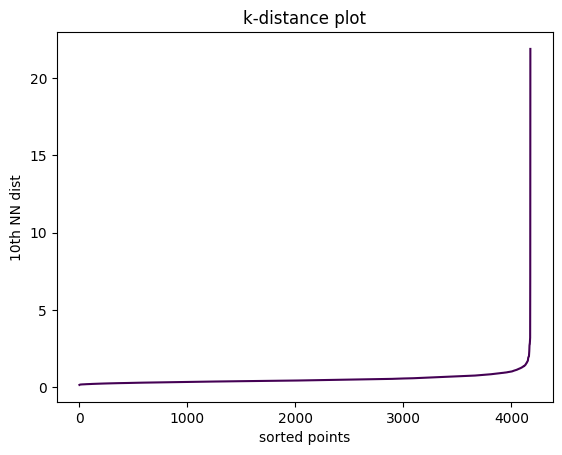

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np, matplotlib.pyplot as plt

min_samples = 10  # try 2*dim or 5..20
nbrs = NearestNeighbors(n_neighbors=min_samples).fit(X_scaled)
dists, _ = nbrs.kneighbors(X_scaled)
kdist = np.sort(dists[:, -1])     # distance to kth neighbor
plt.plot(kdist); plt.title("k-distance plot"); plt.ylabel(f"{min_samples}th NN dist"); plt.xlabel("sorted points")
plt.show()
# Choose eps near the elbow of this curve, then rerun DBSCAN with that eps/min_samples.
